In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


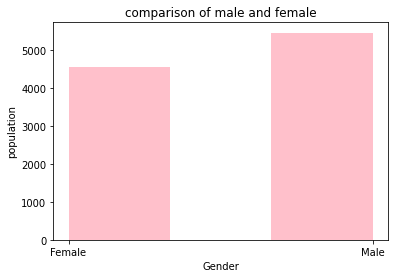

In [3]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

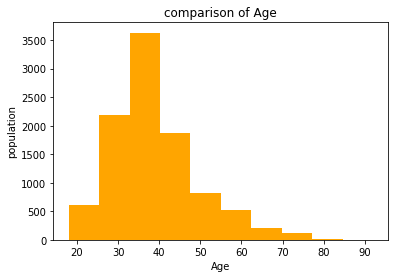

In [4]:
# comparison of age in the dataset

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()


<AxesSubplot:xlabel='Gender'>

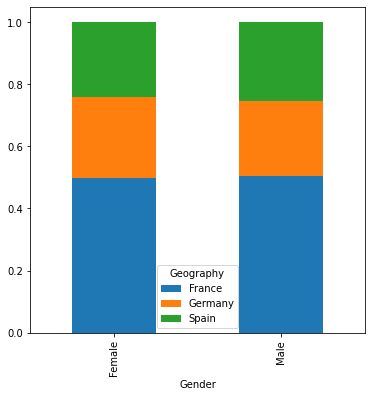

In [5]:
# comparison between Geography and Gender

Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

In [6]:
# calculating total balance in france, germany and spain

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


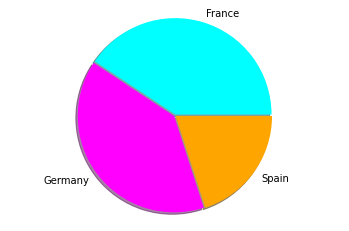

In [7]:
labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

In [8]:
# Removing the unnecassary features from the dataset

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)



print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [9]:
data.shape

(10000, 11)

In [10]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = data.iloc[:,0:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)
#print(y)

(10000, 10)
(10000,)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [11]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

x = pd.get_dummies(x)

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [12]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(7500, 13)
(7500,)
(2500, 13)
(2500,)


In [13]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.735507,0.015266,0.008860,0.673160,2.535034,-1.553624,-1.034460,-1.640810,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,1.024427,-0.652609,0.008860,-1.207724,0.804242,0.643657,-1.034460,-0.079272,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,0.808295,-0.461788,1.393293,-0.356937,0.804242,0.643657,0.966688,-0.996840,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,0.396614,-0.080145,0.008860,-0.009356,-0.926551,0.643657,0.966688,-1.591746,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-0.467915,1.255605,0.701077,-1.207724,0.804242,0.643657,0.966688,1.283302,0.984651,-0.568112,-0.574682,-0.919743,0.919743


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8096
Testing Accuracy : 0.8092
[[1916   75]
 [ 402  107]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9998666666666667
Testing Accuracy : 0.8688
[[1911   80]
 [ 248  261]]


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier() 
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuaracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.7944
[[1699  292]
 [ 222  287]]
